# Definition of Files

Import of Classes from `ICONProcessor` and definition of `.nc` Files to be used:
* Definition file of Grid: `<area>_<resolution>m_DOM<nr>.nc`
* Definition of corresponding file containing external parameters (e.g. topo, albedo, land use, etc.): `external_parameter_icon_<area>_<resolution>m_DOM<nr>_<suffix>_tiles.nc`
* Definition of output file from ICON run (contain actual variables like temperature, wind, etc.): `LES_DOM01_ML_<nr>.nc`

In [7]:
from ICONProcessor.ICONGrid import ICONGrid
from ICONProcessor.ICONDataGrid import ICONDataGrid

import geopandas as gpd
import matplotlib.pyplot as plt

## Example: HEFEX study area

The following scenarios will be used:
* 51m resolution:
    * plot data for single cell from original ICON output file
    * plot data for single cell from extracted and merged point file

For the external parameters, the original files have been modified, e.g. the albedo values have been replaced as well as the land use category for *snow & ice* based on the RGI 7.0 outlines.

In [8]:
root_dir = '/Users/geoalxx/Python/_ICON_data/hef/'

file_51_grid       = root_dir + 'grid/hef_51m_DOM07.nc'
file_51_extpar     = root_dir + 'grid/external_parameter_icon_hef_51m_DOM07_ALBEDO_RGI_tiles.nc'
file_51_data_grid  = root_dir + 'data/LES_DOM01_ML_0032.nc'
file_51_data_point = root_dir + 'data/LES_DOM01_37433_ML.nc'

Read RGI v7.0 outlines for Central Europe as GeoDataframe. The outlines can be used for the plots.

In [9]:
rgi = gpd.read_file('/Users/geoalxx/Python/_shp_collection/RGI7/RGI2000-v7.0-G-11_central_europe/RGI2000-v7.0-G-11_central_europe.shp')
rgi_hef = rgi.loc[rgi['rgi_id'] == 'RGI2000-v7.0-G-11-03116']
display(rgi_hef)

,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m,geometry
3115,RGI2000-v7.0-G-11-03116,11,11-01,G010752E46802N,755531,731,2003-07-30T00:00:00,10.751768,46.802314,32,...,2413.2732,3694.625,3042.9658,3013.4644,18.13811,77.065895,3,COPDEM30,8548,"POLYGON Z ((10.75085 46.81381 0, 10.75112 46.8..."


## Plots using ICON output data

(output files usually contain only 5-6 time steps, i.e. they either need to be merged or multiple files must be loaded for longer modeling periods)

### Show vertical profile of variable over entire modelling period for one grid cell

Notes: 
* 1st plot: data file for entire grid -> ID of grid cell can be used but only a few time steps are shown (if not time-merged, yet)
* 2nd plot: data file for single grid cell #37433 has been extracted and merged (time) beforehand using `CDO` -> since newly created `.nc` file only contains 1 grid cell, cell `ID=1` must be used (error appears that data does not match underlying grid)

In [10]:
# init grid with files for 51m domain
grid_51 = ICONGrid(file_51_grid, file_51_extpar)
datagrid_51 = grid_51.get_ICONDataGrid(file_51_data_grid)

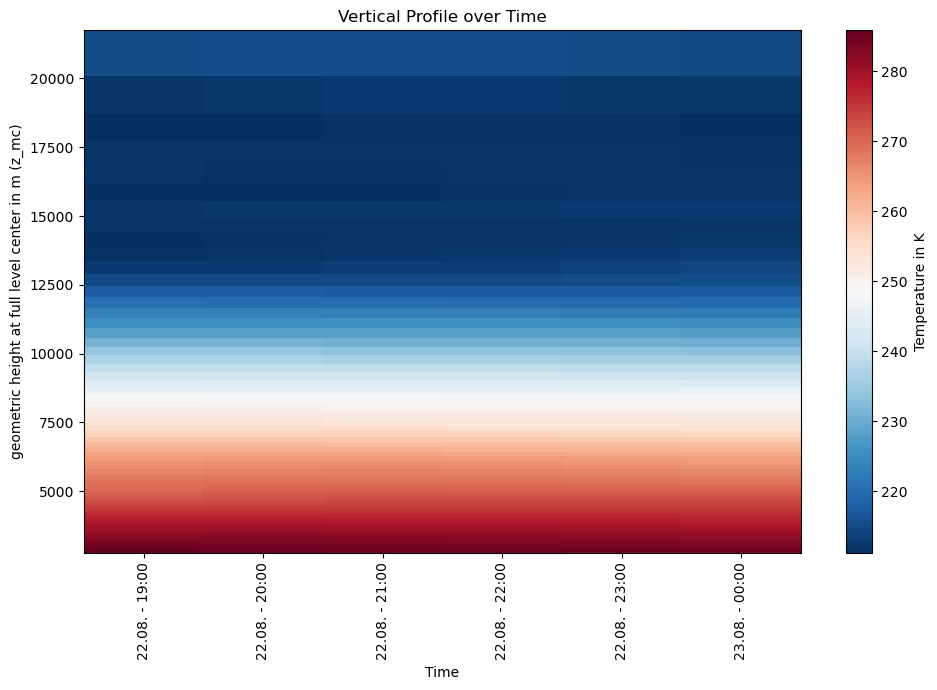

In [11]:
# plot temperature for all model levels and time steps for grid cell with ID 37433
datagrid_51.plot_simple_contour_cell_variable(cell_id=37433, var='temp', xticks_skip=1, cmap='RdBu_r')

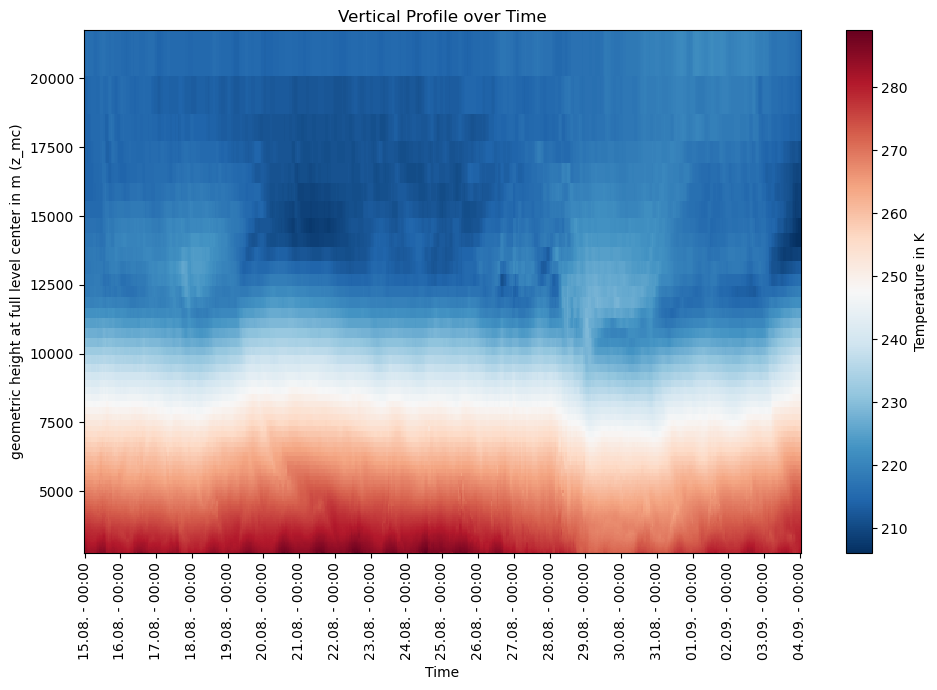

In [12]:
datagrid_cell = grid_51.get_ICONDataGrid(file_51_data_point)
datagrid_cell.plot_simple_contour_cell_variable(cell_id=1, var='temp', xticks_skip=24, cmap='RdBu_r')